#**Install Library**

In [1]:
!pip install basemap-data-hires
!pip install seaborn
!pip install basemap numpy pandas scipy
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 6.7 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.8/935.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 44.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 22.0 MB/s eta 0:00:00


#**Import Library**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm, Normalize
from scipy.stats import linregress
import datetime
from datetime import datetime
import seaborn as sns


#**Read Dataset**

In [3]:
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
df = pd.read_csv(dataset)
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-12-31T17:22:51.700Z,1.0439,126.5326,42.38,4.0,mb,NaN,197.0,0.876,0.98,...,2017-03-23T22:52:11.040Z,"97km WNW of Kota Ternate, Indonesia",earthquake,11.8,27.3,0.183,8.0,reviewed,us,us
1,2016-12-31T07:21:08.220Z,-6.0786,130.0318,137.85,4.6,mb,NaN,82.0,2.271,0.86,...,2017-03-23T22:52:10.040Z,"250km NW of Saumlaki, Indonesia",earthquake,8.9,8.2,0.122,20.0,reviewed,us,us
2,2016-12-30T08:24:53.620Z,-9.1767,123.5689,116.02,4.6,mb,NaN,59.0,0.897,0.89,...,2017-03-23T22:52:09.040Z,"51km NNW of Naisano Dua, Indonesia",earthquake,7.7,6.6,0.110,25.0,reviewed,us,us
3,2016-12-30T07:10:05.390Z,1.7358,126.5028,42.15,5.0,mb,NaN,92.0,1.289,0.95,...,2017-03-23T22:52:09.040Z,"142km NW of Kota Ternate, Indonesia",earthquake,7.8,7.4,0.075,57.0,reviewed,us,us
4,2016-12-30T06:41:20.480Z,-9.1597,118.7325,105.58,4.4,mb,NaN,81.0,3.502,0.64,...,2017-03-23T22:52:09.040Z,"45km SSE of Tolotangga, Indonesia",earthquake,6.7,8.6,0.134,16.0,reviewed,us,us


In [4]:
# Membaca dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
df = pd.read_csv(dataset)

# Mengonversi kolom 'time' menjadi tipe datetime
df['time'] = pd.to_datetime(df['time'])

# Menerapkan filter untuk tahun 1966 - 2016
df_filtered = df[(df['time'].dt.year >= 1966) & (df['time'].dt.year <= 2016)]

# Menampilkan DataFrame yang telah difilter
df = df_filtered
df.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-12-31 17:22:51.700000+00:00,1.0439,126.5326,42.38,4.0,mb,NaN,197.0,0.876,0.98,...,2017-03-23T22:52:11.040Z,"97km WNW of Kota Ternate, Indonesia",earthquake,11.8,27.3,0.183,8.0,reviewed,us,us
1,2016-12-31 07:21:08.220000+00:00,-6.0786,130.0318,137.85,4.6,mb,NaN,82.0,2.271,0.86,...,2017-03-23T22:52:10.040Z,"250km NW of Saumlaki, Indonesia",earthquake,8.9,8.2,0.122,20.0,reviewed,us,us
2,2016-12-30 08:24:53.620000+00:00,-9.1767,123.5689,116.02,4.6,mb,NaN,59.0,0.897,0.89,...,2017-03-23T22:52:09.040Z,"51km NNW of Naisano Dua, Indonesia",earthquake,7.7,6.6,0.110,25.0,reviewed,us,us
3,2016-12-30 07:10:05.390000+00:00,1.7358,126.5028,42.15,5.0,mb,NaN,92.0,1.289,0.95,...,2017-03-23T22:52:09.040Z,"142km NW of Kota Ternate, Indonesia",earthquake,7.8,7.4,0.075,57.0,reviewed,us,us
4,2016-12-30 06:41:20.480000+00:00,-9.1597,118.7325,105.58,4.4,mb,NaN,81.0,3.502,0.64,...,2017-03-23T22:52:09.040Z,"45km SSE of Tolotangga, Indonesia",earthquake,6.7,8.6,0.134,16.0,reviewed,us,us
5,2016-12-30 06:06:34.030000+00:00,0.4049,123.7758,211.57,4.6,mb,NaN,55.0,1.753,0.77,...,2017-03-23T22:52:09.040Z,"23km W of Molibagu, Indonesia",earthquake,6.6,7.2,0.099,30.0,reviewed,us,us
6,2016-12-29 22:30:19.300000+00:00,-9.0279,118.6639,79.00,6.3,mww,NaN,26.0,3.553,1.42,...,2017-03-23T22:52:09.040Z,"29km S of Tolotangga, Indonesia",earthquake,6.2,1.8,NaN,NaN,reviewed,us,us
7,2016-12-29 14:37:33.160000+00:00,3.9723,126.7909,82.30,4.3,mb,NaN,177.0,3.230,0.83,...,2017-03-23T22:52:08.040Z,"216km SE of Sarangani, Philippines",earthquake,5.3,14.5,0.177,9.0,reviewed,us,us
8,2016-12-29 08:16:44.850000+00:00,-4.6133,101.7366,31.98,4.3,mb,NaN,112.0,1.241,0.62,...,2017-03-23T22:52:08.040Z,"107km SSW of Bengkulu, Indonesia",earthquake,5.2,6.8,0.147,13.0,reviewed,us,us
9,2016-12-29 01:22:26.280000+00:00,-4.7053,101.6970,31.82,4.3,mb,NaN,207.0,1.300,0.35,...,2017-03-23T22:52:08.040Z,"118km SSW of Bengkulu, Indonesia",earthquake,10.8,5.2,0.217,6.0,reviewed,us,us


In [5]:
# Mengambil hanya kolom yang diinginkan
selected_columns = ['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'net', 'id', 'updated', 'type', 'status', 'locationSource', 'magSource']
df_selected_columns = df[selected_columns]

# Menampilkan DataFrame yang hanya berisi kolom yang dipilih
df = df_selected_columns
df.head(10)

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource
0,2016-12-31 17:22:51.700000+00:00,1.0439,126.5326,42.38,4.0,mb,us,us10007tyr,2017-03-23T22:52:11.040Z,earthquake,reviewed,us,us
1,2016-12-31 07:21:08.220000+00:00,-6.0786,130.0318,137.85,4.6,mb,us,us10007nv4,2017-03-23T22:52:10.040Z,earthquake,reviewed,us,us
2,2016-12-30 08:24:53.620000+00:00,-9.1767,123.5689,116.02,4.6,mb,us,us10007nqa,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us
3,2016-12-30 07:10:05.390000+00:00,1.7358,126.5028,42.15,5.0,mb,us,us10007npz,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us
4,2016-12-30 06:41:20.480000+00:00,-9.1597,118.7325,105.58,4.4,mb,us,us10007tqx,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us
5,2016-12-30 06:06:34.030000+00:00,0.4049,123.7758,211.57,4.6,mb,us,us10007npe,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us
6,2016-12-29 22:30:19.300000+00:00,-9.0279,118.6639,79.00,6.3,mww,us,us10007nl0,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us
7,2016-12-29 14:37:33.160000+00:00,3.9723,126.7909,82.30,4.3,mb,us,us10007tpb,2017-03-23T22:52:08.040Z,earthquake,reviewed,us,us
8,2016-12-29 08:16:44.850000+00:00,-4.6133,101.7366,31.98,4.3,mb,us,us10007tnz,2017-03-23T22:52:08.040Z,earthquake,reviewed,us,us
9,2016-12-29 01:22:26.280000+00:00,-4.7053,101.6970,31.82,4.3,mb,us,us10007tnc,2017-03-23T22:52:08.040Z,earthquake,reviewed,us,us


In [6]:
def bvalue_OLS(magnitude_series):
    magnitudes = magnitude_series.value_counts().sort_index()

    M = magnitudes.index.tolist()
    values = magnitudes.tolist()
    N = np.cumsum(values[::-1])[::-1]
    logN = np.log10(N)
    b,a = np.polyfit(M, logN, 1)
    return b*(-1)

def generate_GR_Adeli_Panakkat_features(earthquake_dataset, time_window):
    earthquake_dataset['b-value'] = earthquake_dataset['mag'].rolling(time_window).apply(func=bvalue_OLS,raw = False).shift(1)
    return earthquake_dataset

In [7]:
indonesia_region = df[df.mag >= 4.5].reset_index(drop = True)

In [8]:
indonesia_region = generate_GR_Adeli_Panakkat_features(indonesia_region, 50)

In [9]:
indonesia_region.tail()

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,b-value
31459,1966-03-08 05:41:06+00:00,1.903,126.334,35.0,6.2,mw,iscgem,iscgem849033,2015-05-13T18:53:00.000Z,earthquake,automatic,iscgem,iscgem,0.846806
31460,1966-02-13 06:36:01+00:00,-6.561,132.642,35.0,6.0,mw,iscgem,iscgem850145,2015-05-13T18:53:00.000Z,earthquake,automatic,iscgem,iscgem,0.852336
31461,1966-02-09 07:18:50+00:00,-9.851,116.376,45.0,5.8,mw,iscgem,iscgem850037,2015-05-13T18:53:00.000Z,earthquake,automatic,iscgem,iscgem,0.857352
31462,1966-02-03 05:48:11+00:00,0.211,123.555,158.6,5.7,mw,iscgem,iscgem849825,2015-05-13T18:53:00.000Z,earthquake,automatic,iscgem,iscgem,0.853431
31463,1966-01-11 03:10:54+00:00,0.586,120.141,35.0,5.9,mw,iscgem,iscgem850772,2015-05-13T18:53:00.000Z,earthquake,automatic,iscgem,iscgem,0.846995


#**Variasi Temporal nilai b**

In [12]:
df = indonesia_region
# Mengonversi kolom 'time' ke tipe data datetime
df['time'] = pd.to_datetime(df['time'])

# Menambahkan kolom 'year' yang berisi tahun dari kolom 'time'
df['year'] = df['time'].dt.year

# Menampilkan lima baris pertama DataFrame
df.head(5)


,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,b-value,year
0,2016-12-31 07:21:08.220000+00:00,-6.0786,130.0318,137.85,4.6,mb,us,us10007nv4,2017-03-23T22:52:10.040Z,earthquake,reviewed,us,us,NaN,2016
1,2016-12-30 08:24:53.620000+00:00,-9.1767,123.5689,116.02,4.6,mb,us,us10007nqa,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us,NaN,2016
2,2016-12-30 07:10:05.390000+00:00,1.7358,126.5028,42.15,5.0,mb,us,us10007npz,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us,NaN,2016
3,2016-12-30 06:06:34.030000+00:00,0.4049,123.7758,211.57,4.6,mb,us,us10007npe,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us,NaN,2016
4,2016-12-29 22:30:19.300000+00:00,-9.0279,118.6639,79.00,6.3,mww,us,us10007nl0,2017-03-23T22:52:09.040Z,earthquake,reviewed,us,us,NaN,2016


In [13]:
#reduksi kolom
fixkolom = indonesia_region[['time','latitude', 'longitude', 'depth', 'mag','magType','year','b-value']]
fixkolom.head(10)

,time,latitude,longitude,depth,mag,magType,year,b-value
0,2016-12-31 07:21:08.220000+00:00,-6.0786,130.0318,137.85,4.6,mb,2016,NaN
1,2016-12-30 08:24:53.620000+00:00,-9.1767,123.5689,116.02,4.6,mb,2016,NaN
2,2016-12-30 07:10:05.390000+00:00,1.7358,126.5028,42.15,5.0,mb,2016,NaN
3,2016-12-30 06:06:34.030000+00:00,0.4049,123.7758,211.57,4.6,mb,2016,NaN
4,2016-12-29 22:30:19.300000+00:00,-9.0279,118.6639,79.00,6.3,mww,2016,NaN
5,2016-12-26 21:36:34.160000+00:00,1.8075,126.4263,40.81,4.6,mb,2016,NaN
6,2016-12-26 18:24:37.040000+00:00,4.1368,96.0179,77.74,4.9,mb,2016,NaN
7,2016-12-26 16:39:38.130000+00:00,3.9631,126.5343,35.00,4.5,mb,2016,NaN
8,2016-12-24 20:26:05.390000+00:00,5.9083,126.4638,10.00,4.7,mb,2016,NaN
9,2016-12-23 19:15:39.190000+00:00,-0.2458,124.4794,73.18,5.0,mb,2016,NaN


In [14]:
# Groupby & multiple aggregations
result = fixkolom.groupby('year')['b-value'].aggregate(['mean','min','max','sum'])
print(result)

          mean       min       max          sum
year                                           
1966  0.836904  0.775289  0.914020    15.901174
1967  0.768908  0.671590  0.919918    23.836157
1968  0.787856  0.674477  0.892604    30.726391
1969  0.984788  0.818467  1.126353    43.330666
1970  0.796583  0.751232  0.833282    27.880417
1971  0.809275  0.762977  0.896439    41.273012
1972  0.807106  0.653697  1.132589    50.040565
1973  1.093015  0.830394  1.484942   271.067741
1974  1.014037  0.679291  1.588186   319.421552
1975  0.984372  0.763296  1.323090   327.795831
1976  0.950086  0.647156  1.384442   347.731618
1977  1.023866  0.714813  1.328513   447.429373
1978  1.085209  0.834681  1.548666   363.545012
1979  0.919473  0.533799  1.382571   394.454107
1980  1.183235  0.823351  1.574115   469.744479
1981  1.206222  0.836223  1.829928   424.589977
1982  1.101069  0.934636  1.407328   453.640589
1983  1.038753  0.598159  1.741163   666.879646
1984  0.990208  0.524544  1.566019   585

In [19]:
b_tot = fixkolom.groupby("year")["b-value"].sum()

b_ave = result["sum"].mean()

#**Temporal variation using values-b**

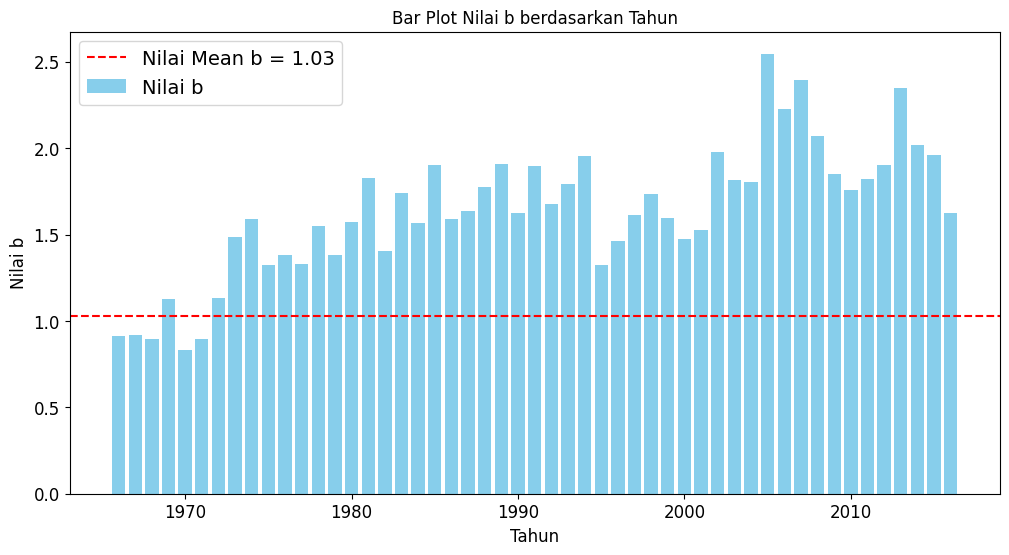

In [30]:
import matplotlib.pyplot as plt

# Filter data untuk tahun 1966 - 2016
filtered_data = fixkolom[(fixkolom['year'] >= 1966) & (fixkolom['year'] <= 2016)]

# Hitung nilai mean dari b-value
mean_b_value = filtered_data['b-value'].mean()

# Plot bar plot
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['year'], filtered_data['b-value'], color='skyblue', label='Nilai b')
plt.axhline(y=mean_b_value, color='red', linestyle='--', label=f'Nilai Mean b = {mean_b_value:.2f}')
plt.xlabel('Tahun')
plt.ylabel('Nilai b')
plt.title('Bar Plot Nilai b berdasarkan Tahun')
plt.legend()
plt.show()
